VISUALIZACION DE CSV ACTIVA Y APARENTE

In [63]:
#PRIMER CARGAMOS LOS ARCHIVOS

import pandas as pd

dispositivo = 'ventilador'
df_activa = pd.read_csv(f"datos_dispositivos_csv/{dispositivo}/{dispositivo}_Potencia_activa_Total.csv")
df_aparente= pd.read_csv(f"datos_dispositivos_csv/{dispositivo}/{dispositivo}_Potencia_aparente_Total.csv")

print(df_activa.head())
print(df_aparente.head())

                   fecha  Potencia_activa_Total
0  2024-09-23_10-00-00.7               0.003036
1  2024-09-23_10-00-01.5               0.003564
2  2024-09-23_10-00-02.3               0.003778
3  2024-09-23_10-00-03.1               0.003487
4  2024-09-23_10-00-03.9               0.003715
                   fecha  Potencia_aparente_Total
0  2024-09-23_10-00-00.7                 0.006077
1  2024-09-23_10-00-01.5                 0.007006
2  2024-09-23_10-00-02.3                 0.007684
3  2024-09-23_10-00-03.1                 0.006954
4  2024-09-23_10-00-03.9                 0.007410


CREACIÓN DE NUEVO ARCHIVO DONDE SE CONCATENA Y AGREGA LA POTENCIA REACTIVA

In [64]:
df_combined = pd.merge(df_activa, df_aparente, on='fecha', suffixes=('_activa', '_aparente'))

# Guardar el nuevo DataFrame en un archivo CSV
df_combined.to_csv(f"Potencia_reactiva.csv", index=False)

# Mostrar las primeras filas del nuevo DataFrame
print(df_combined.head())

                   fecha  Potencia_activa_Total  Potencia_aparente_Total
0  2024-09-23_10-00-00.7               0.003036                 0.006077
1  2024-09-23_10-00-01.5               0.003564                 0.007006
2  2024-09-23_10-00-02.3               0.003778                 0.007684
3  2024-09-23_10-00-03.1               0.003487                 0.006954
4  2024-09-23_10-00-03.9               0.003715                 0.007410


INCUSIÓN DE POTENCIA REACTIVA EN NUEVA COLUMNA

In [65]:
# Calcular la potencia aparente
import numpy as np
df = pd.read_csv('Potencia_reactiva.csv')
df['Potencia_reactiva'] = np.sqrt(df['Potencia_activa_Total']** 2 + df['Potencia_aparente_Total']**2)

# Guardar el DataFrame actualizado en el mismo archivo CSV
df.to_csv('Potencias.csv', index=False)  # Sobrescribe el archivo original




APLICAMOS LOS CAMBIOS

In [66]:

df = pd.read_csv('Potencias.csv')
#ACTIVA
num_datos = len(df['Potencia_activa_Total'])
suma = sum(df['Potencia_activa_Total'])

#APARENTE
num_datos2 = len(df['Potencia_aparente_Total'])
suma2 = sum(df['Potencia_aparente_Total'])

#REACTIVA
num_datos3 = len(df['Potencia_reactiva'])
suma3 = sum(df['Potencia_reactiva'])

promedio = suma / num_datos
promedio2 = suma2 / num_datos2
promedio3 = suma3 / num_datos3

print("promedio Potencia ACTIVA: ", promedio)
print("promedio Potencia APARENTE: ", promedio2)
print("promedio Potencia REACTIVA: ", promedio3)

promedio Potencia ACTIVA:  0.03886624753131987
promedio Potencia APARENTE:  0.04182598684252482
promedio Potencia REACTIVA:  0.0572175205174844


In [67]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('Potencias.csv')

# Cálculo de promedios
num_datos = len(df['Potencia_activa_Total'])
suma = sum(df['Potencia_activa_Total'])

num_datos2 = len(df['Potencia_aparente_Total'])
suma2 = sum(df['Potencia_aparente_Total'])

num_datos3 = len(df['Potencia_reactiva'])
suma3 = sum(df['Potencia_reactiva'])

promedio = suma / num_datos
promedio2 = suma2 / num_datos2
promedio3 = suma3 / num_datos3

# Mostrar promedios en consola
print("Promedio Potencia ACTIVA: ", promedio)
print("Promedio Potencia APARENTE: ", promedio2)
print("Promedio Potencia REACTIVA: ", promedio3)

# Crear un DataFrame para guardar los promedios

resultados = {
    'Potencia_activa_Total': [promedio],
    'Potencia_aparente_Total': [promedio2],
    'Potencia_reactiva': [promedio3],
    'dispositivo': [dispositivo],
    
}
df_resultados = pd.DataFrame(resultados)

# Guardar el DataFrame como un archivo CSV
archivo_csv = f"{dispositivo}_promedios_potencias.csv"
df_resultados.to_csv(archivo_csv, index=False)

print(f"Datos de promedios guardados en {archivo_csv}")


Promedio Potencia ACTIVA:  0.03886624753131987
Promedio Potencia APARENTE:  0.04182598684252482
Promedio Potencia REACTIVA:  0.0572175205174844
Datos de promedios guardados en ventilador_promedios_potencias.csv


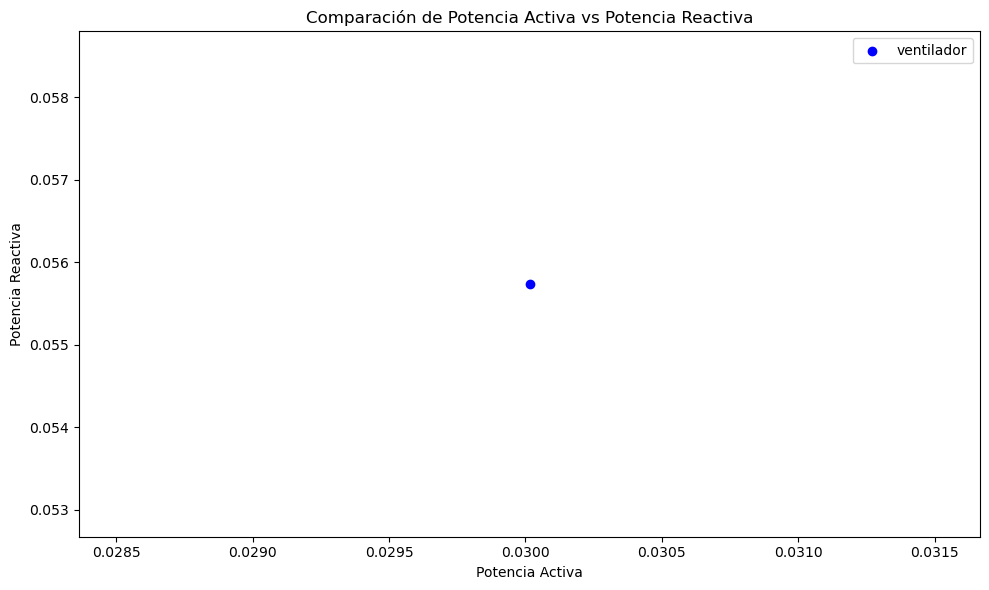

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



x_values = [promedio]  # Lista con el valor de potencia activa
y_values = [promedio3]  # Lista con el valor de potencia reactiva

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='b', label=f"{dispositivo}")

# Añadir títulos y etiquetas
plt.title('Comparación de Potencia Activa vs Potencia Reactiva')
plt.xlabel('Potencia Activa')
plt.ylabel('Potencia Reactiva')
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [35]:

# Crear la ruta del archivo
ruta = f"{dispositivo}.txt"  # Solo se crea el nombre del archivo

# Guardar en un archivo de texto
with open(ruta, 'w') as f:
    f.write(str(promedio2))